In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset/english.csv") 


print(df.head())
print("Total samples:", len(df))

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0
Total samples: 3410


In [3]:
print(df.columns)

Index(['image', 'label'], dtype='object')


In [4]:
image_paths = df['image'].values
labels = df['label'].values

print("Total:", len(image_paths))

Total: 3410


Size: (1200, 900)
Mode: RGB


(np.float64(-0.5), np.float64(1199.5), np.float64(899.5), np.float64(-0.5))

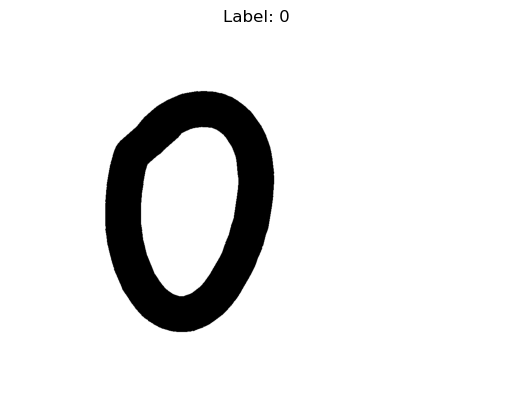

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

sample_path = os.path.join("dataset", image_paths[0])
img = Image.open(sample_path)

print("Size:", img.size)
print("Mode:", img.mode)

plt.imshow(img, cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.axis("off")

In [6]:
import numpy as np
from PIL import Image
import os

X = [] #image array
y = [] #labels

for path, label in zip(image_paths, labels):
    full_path = os.path.join("dataset", path)

    img = Image.open(full_path)
    
    img = img.convert("L")  # converting to grayscale
    
    img = img.resize((28, 28))  # resizing
    
    img_array = np.array(img) # convert to array
    
    img_array = img_array / 255.0  # normalization
    
    img_array = img_array.flatten() # flattening
    
    X.append(img_array)
    y.append(label)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (3410, 784)
y shape: (3410,)


In [7]:
from sklearn.model_selection import train_test_split

# train 70%, temp 30%
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# val 15%, test 15%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (2387, 784)
Validation: (511, 784)
Test: (512, 784)


In [8]:
import numpy as np

class Perceptron:
    def __init__(self, lr=0.01, epochs=10):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0

        # convert labels to {-1, +1}
        y_ = np.where(y > 0, 1, -1)

        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.w) + self.b
                y_pred = 1 if linear_output >= 0 else -1

                if y_[i] * y_pred <= 0:
                    self.w += self.lr * y_[i] * X[i]
                    self.b += self.lr * y_[i]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, 0)

In [9]:
class MulticlassPerceptron:
    def __init__(self, lr=0.01, epochs=10):
        self.lr = lr
        self.epochs = epochs
        self.models = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)

        for cls in self.classes:
            print(f"Training perceptron for class {cls}")

            # binary labels for this class
            y_binary = np.where(y == cls, 1, 0)

            model = Perceptron(lr=self.lr, epochs=self.epochs)
            model.fit(X, y_binary)

            self.models[cls] = model

    def predict(self, X):
        scores = []

        for cls in self.classes:
            model = self.models[cls]
            score = np.dot(X, model.w) + model.b
            scores.append(score)

        scores = np.array(scores)
        preds = self.classes[np.argmax(scores, axis=0)]
        return preds

In [10]:
pla = MulticlassPerceptron(lr=0.01, epochs=10)
pla.fit(X_train, y_train)

Training perceptron for class 0
Training perceptron for class 1
Training perceptron for class 2
Training perceptron for class 3
Training perceptron for class 4
Training perceptron for class 5
Training perceptron for class 6
Training perceptron for class 7
Training perceptron for class 8
Training perceptron for class 9
Training perceptron for class A
Training perceptron for class B
Training perceptron for class C
Training perceptron for class D
Training perceptron for class E
Training perceptron for class F
Training perceptron for class G
Training perceptron for class H
Training perceptron for class I
Training perceptron for class J
Training perceptron for class K
Training perceptron for class L
Training perceptron for class M
Training perceptron for class N
Training perceptron for class O
Training perceptron for class P
Training perceptron for class Q
Training perceptron for class R
Training perceptron for class S
Training perceptron for class T
Training perceptron for class U
Training

In [11]:
from sklearn.metrics import accuracy_score, classification_report

val_preds = pla.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))

Validation Accuracy: 0.06457925636007827
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         9
           2       0.36      0.44      0.40         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         8
           5       0.02      0.62      0.04         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8
           A       0.00      0.00      0.00         9
           B       0.00      0.00      0.00         8
           C       0.00      0.00      0.00         8
           D       0.00      0.00      0.00         8
           E       0.00      0.00      0.00         9
           F       0.00      0.00      0.00         8
           G       0.00      0.00      0

C:\Users\monis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\monis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\monis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

y_train_oh = encoder.fit_transform(y_train.reshape(-1,1))
y_val_oh   = encoder.transform(y_val.reshape(-1,1))
y_test_oh  = encoder.transform(y_test.reshape(-1,1))

print("One-hot shape:", y_train_oh.shape)

One-hot shape: (2387, 62)


In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    batch_size=64,
    max_iter=200,
    random_state=42,
    verbose=True
)

mlp.fit(X_train, y_train)

Iteration 1, loss = 4.18579711
Iteration 2, loss = 4.13187283
Iteration 3, loss = 4.12873306
Iteration 4, loss = 4.12766780
Iteration 5, loss = 4.12215966
Iteration 6, loss = 4.12495806
Iteration 7, loss = 4.13090129
Iteration 8, loss = 4.13036510
Iteration 9, loss = 4.13013871
Iteration 10, loss = 4.13001843
Iteration 11, loss = 4.13092590
Iteration 12, loss = 4.12963372
Iteration 13, loss = 4.12945400
Iteration 14, loss = 4.12931742
Iteration 15, loss = 4.12914483
Iteration 16, loss = 4.12902132
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


,hidden_layer_sizes,"(128,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,64
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,42


In [16]:
from sklearn.metrics import accuracy_score

val_preds = mlp.predict(X_val)
print("MLP Validation Accuracy:", accuracy_score(y_val, val_preds))

MLP Validation Accuracy: 0.015655577299412915


In [17]:
print("Unique labels:", len(set(y_train)))
print("Sample labels:", y_train[:20])
print("X_train shape:", X_train.shape)

Unique labels: 62
Sample labels: ['3' 'W' '2' 'W' 'A' 'S' 'w' 'n' 'O' 'K' 'e' 'O' 'G' '1' 'i' 'o' 'p' 'l'
 'h' 'd']
X_train shape: (2387, 784)


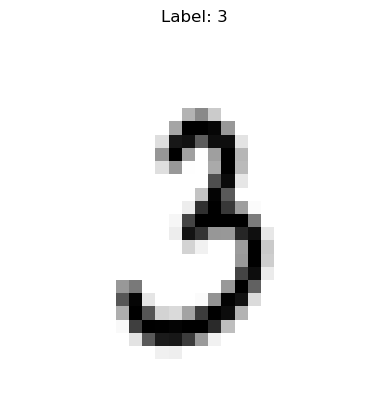

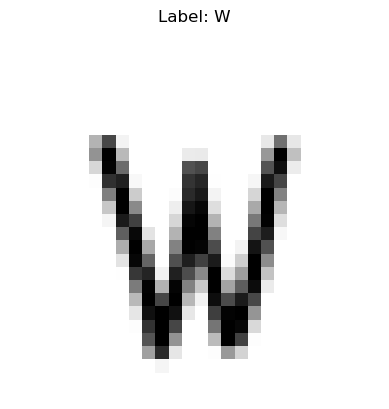

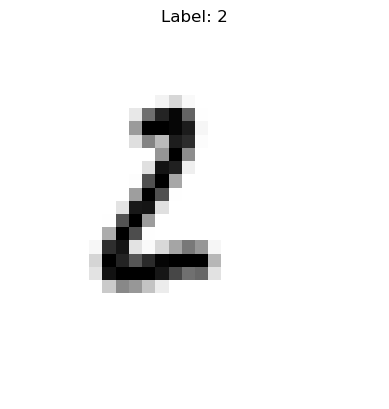

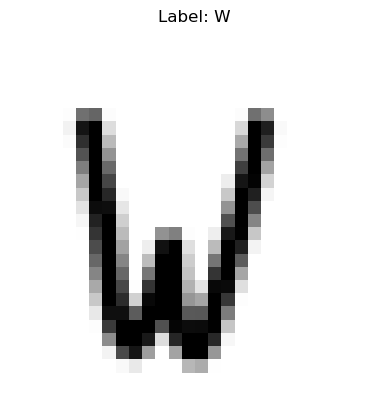

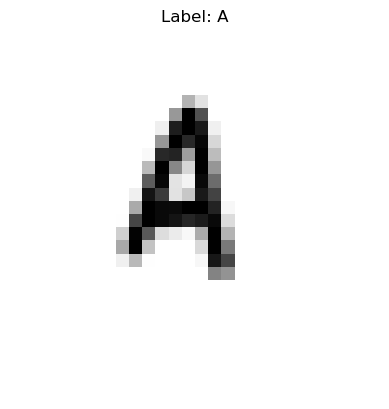

In [18]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(5):
    img = X_train[i].reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
    plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [20]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    batch_size=64,
    max_iter=200,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

val_preds = mlp.predict(X_val_scaled)
print("MLP Validation Accuracy:", accuracy_score(y_val, val_preds))

MLP Validation Accuracy: 0.45401174168297453


In [21]:
# try 2 hidden layers
mlp2 = MLPClassifier(
    hidden_layer_sizes=(256,128),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    batch_size=64,
    max_iter=200,
    random_state=42
)

mlp2.fit(X_train_scaled, y_train)

val_preds = mlp2.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))

Validation Accuracy: 0.49706457925636005


In [22]:
# 3 hidden layers
mlp3 = MLPClassifier(
    hidden_layer_sizes=(512,256,128),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    batch_size=64,
    max_iter=200,
    random_state=42
)

mlp3.fit(X_train_scaled, y_train)

val_preds = mlp3.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))

Validation Accuracy: 0.49510763209393344


In [23]:
mlp_lr = MLPClassifier(
    hidden_layer_sizes=(256,128),
    activation='relu',
    solver='adam',
    learning_rate_init=0.0005,
    batch_size=64,
    max_iter=200,
    random_state=42
)

mlp_lr.fit(X_train_scaled, y_train)

val_preds = mlp_lr.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))

Validation Accuracy: 0.4657534246575342


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

hidden_configs = [
    (128,),
    (256,128),
    (512,256,128)
]

hidden_accuracies = []

for config in hidden_configs:
    print("Training for hidden layers:", config)
    
    model = MLPClassifier(
        hidden_layer_sizes=config,
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        batch_size=64,
        max_iter=200,
        random_state=42
    )
    
    model.fit(X_train_scaled, y_train)
    val_preds = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, val_preds)
    hidden_accuracies.append(acc)

    print("Validation Accuracy:", acc)

Training for hidden layers: (128,)
Validation Accuracy: 0.45401174168297453
Training for hidden layers: (256, 128)
Validation Accuracy: 0.49706457925636005
Training for hidden layers: (512, 256, 128)
Validation Accuracy: 0.49510763209393344


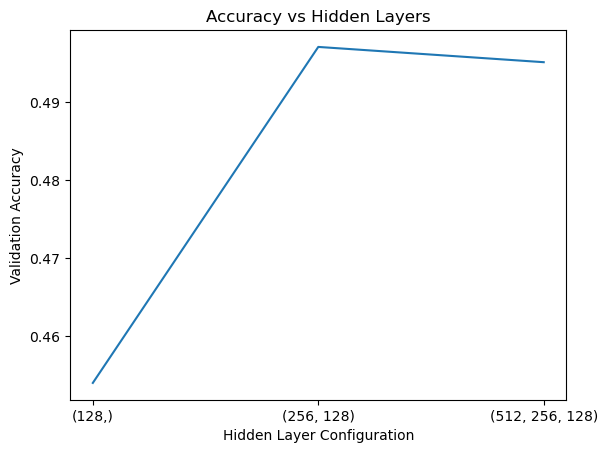

In [47]:
plt.figure()
plt.plot([str(h) for h in hidden_configs], hidden_accuracies)
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy vs Hidden Layers")
plt.savefig("Accuracy vs Hidden Layers")
plt.show()

In [26]:
learning_rates = [0.01, 0.001, 0.0005]

lr_accuracies = []

for lr in learning_rates:
    print("Training for learning rate:", lr)
    
    model = MLPClassifier(
        hidden_layer_sizes=(256,128),
        activation='relu',
        solver='adam',
        learning_rate_init=lr,
        batch_size=64,
        max_iter=200,
        random_state=42
    )
    
    model.fit(X_train_scaled, y_train)
    val_preds = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, val_preds)
    lr_accuracies.append(acc)

    print("Validation Accuracy:", acc)

Training for learning rate: 0.01
Validation Accuracy: 0.37181996086105673
Training for learning rate: 0.001
Validation Accuracy: 0.49706457925636005
Training for learning rate: 0.0005
Validation Accuracy: 0.4657534246575342


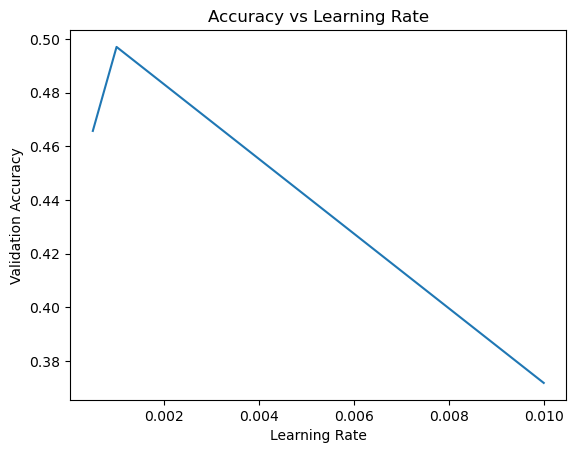

In [46]:
plt.figure()
plt.plot(learning_rates, lr_accuracies)
plt.xlabel("Learning Rate")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy vs Learning Rate")
plt.savefig("Accuracy vs Learning rate MLP")
plt.show()

In [29]:
hidden_layer_sizes = (256,128)
learning_rate = 0.001
activation = 'relu'
optimizer = 'adam'
batch_size = 64

In [30]:
best_mlp = MLPClassifier(
    hidden_layer_sizes=(256,128),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    batch_size=64,
    max_iter=200,
    random_state=42
)

best_mlp.fit(X_train_scaled, y_train)

test_preds = best_mlp.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report

print("Final MLP Test Accuracy:", accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds, zero_division=0))

Final MLP Test Accuracy: 0.46484375
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.80      0.50      0.62         8
           2       0.71      0.62      0.67         8
           3       0.45      0.62      0.53         8
           4       0.33      0.12      0.18         8
           5       0.20      0.12      0.15         8
           6       0.40      0.50      0.44         8
           7       0.43      0.67      0.52         9
           8       0.42      0.62      0.50         8
           9       0.40      0.50      0.44         8
           A       0.55      0.75      0.63         8
           B       0.50      0.56      0.53         9
           C       0.67      0.75      0.71         8
           D       0.57      0.50      0.53         8
           E       0.29      0.25      0.27         8
           F       0.75      0.38      0.50         8
           G       0.83      0.62      0.71  

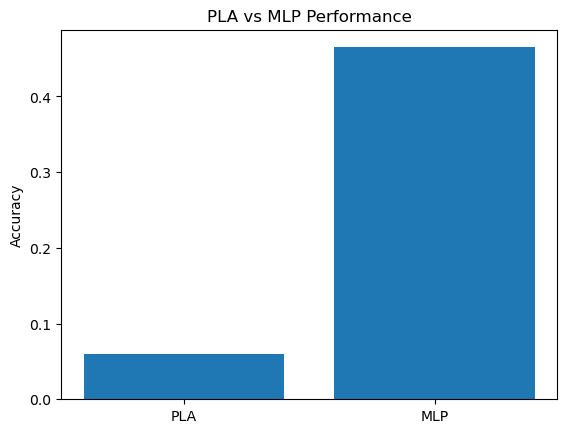

In [45]:
import matplotlib.pyplot as plt

models = ["PLA", "MLP"]
accuracies = [0.06, 0.4648]

plt.figure()
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("PLA vs MLP Performance")
plt.savefig("PLA vs MLP performance")
plt.show()

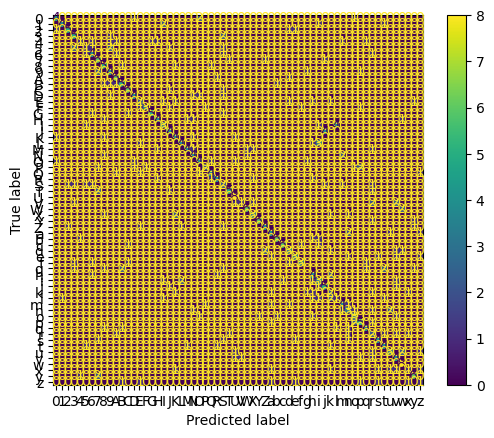

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, test_preds)
plt.show()

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define required combinations
configs = [
    {
        "hidden_layer_sizes": (128,),
        "activation": "relu",
        "solver": "sgd",
        "learning_rate_init": 0.01,
        "batch_size": 32
    },
    {
        "hidden_layer_sizes": (256,128),
        "activation": "relu",
        "solver": "adam",
        "learning_rate_init": 0.001,
        "batch_size": 64
    },
    {
        "hidden_layer_sizes": (512,256,128),
        "activation": "tanh",
        "solver": "adam",
        "learning_rate_init": 0.0005,
        "batch_size": 64
    }
]

results = []

for config in configs:
    print("\nTraining configuration:", config)
    
    model = MLPClassifier(
        hidden_layer_sizes=config["hidden_layer_sizes"],
        activation=config["activation"],
        solver=config["solver"],
        learning_rate_init=config["learning_rate_init"],
        batch_size=config["batch_size"],
        max_iter=200,
        random_state=42
    )
    
    model.fit(X_train_scaled, y_train)
    
    val_preds = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, val_preds)
    
    results.append({
        "Hidden Layers": config["hidden_layer_sizes"],
        "Activation": config["activation"],
        "Optimizer": config["solver"],
        "Learning Rate": config["learning_rate_init"],
        "Batch Size": config["batch_size"],
        "Validation Accuracy (%)": acc * 100
    })
    
    print("Validation Accuracy:", acc)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("\nFinal Tuning Results:")
print(results_df)


Training configuration: {'hidden_layer_sizes': (128,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate_init': 0.01, 'batch_size': 32}
Validation Accuracy: 0.4500978473581213

Training configuration: {'hidden_layer_sizes': (256, 128), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'batch_size': 64}
Validation Accuracy: 0.49706457925636005

Training configuration: {'hidden_layer_sizes': (512, 256, 128), 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.0005, 'batch_size': 64}
Validation Accuracy: 0.42857142857142855

Final Tuning Results:
     Hidden Layers Activation Optimizer  Learning Rate  Batch Size  \
0           (128,)       relu       sgd         0.0100          32   
1       (256, 128)       relu      adam         0.0010          64   
2  (512, 256, 128)       tanh      adam         0.0005          64   

   Validation Accuracy (%)  
0                45.009785  
1                49.706458  
2                42.857143  


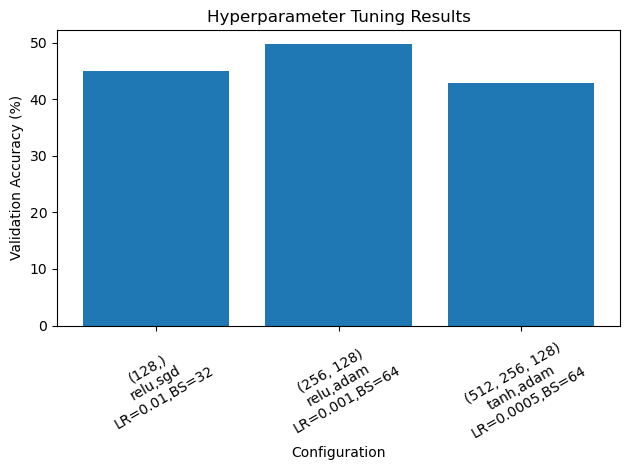

In [34]:
import matplotlib.pyplot as plt

# Create labels for x-axis
labels = []
for r in results:
    label = f"{r['Hidden Layers']}\n{r['Activation']},{r['Optimizer']}\nLR={r['Learning Rate']},BS={r['Batch Size']}"
    labels.append(label)

accuracies = [r["Validation Accuracy (%)"] for r in results]

# Plot
plt.figure()
plt.bar(labels, accuracies)
plt.xlabel("Configuration")
plt.ylabel("Validation Accuracy (%)")
plt.title("Hyperparameter Tuning Results")
plt.xticks(rotation=30)
plt.tight_layout()

# Save graph
plt.savefig("mlp_hyperparameter_tuning.png", dpi=300)

plt.show()

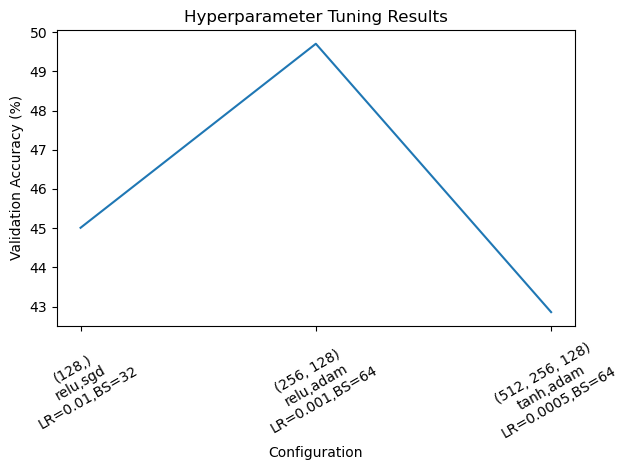

In [35]:
plt.figure()
plt.plot(labels, accuracies)
plt.xlabel("Configuration")
plt.ylabel("Validation Accuracy (%)")
plt.title("Hyperparameter Tuning Results")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("mlp_tuning_line.png", dpi=300)
plt.show()

In [39]:
import numpy as np

class Perceptron:
    def __init__(self, lr=0.01, epochs=10):
        self.lr = lr
        self.epochs = epochs
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        y_ = np.where(y > 0, 1, -1)

        for _ in range(self.epochs):
            errors = 0
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.w) + self.b
                y_pred = 1 if linear_output >= 0 else -1

                if y_[i] * y_pred <= 0:
                    self.w += self.lr * y_[i] * X[i]
                    self.b += self.lr * y_[i]
                    errors += 1

            self.loss_history.append(errors)

In [40]:
pla = MulticlassPerceptron(lr=0.01, epochs=10)
pla.fit(X_train, y_train)

Training perceptron for class 0
Training perceptron for class 1
Training perceptron for class 2
Training perceptron for class 3
Training perceptron for class 4
Training perceptron for class 5
Training perceptron for class 6
Training perceptron for class 7
Training perceptron for class 8
Training perceptron for class 9
Training perceptron for class A
Training perceptron for class B
Training perceptron for class C
Training perceptron for class D
Training perceptron for class E
Training perceptron for class F
Training perceptron for class G
Training perceptron for class H
Training perceptron for class I
Training perceptron for class J
Training perceptron for class K
Training perceptron for class L
Training perceptron for class M
Training perceptron for class N
Training perceptron for class O
Training perceptron for class P
Training perceptron for class Q
Training perceptron for class R
Training perceptron for class S
Training perceptron for class T
Training perceptron for class U
Training

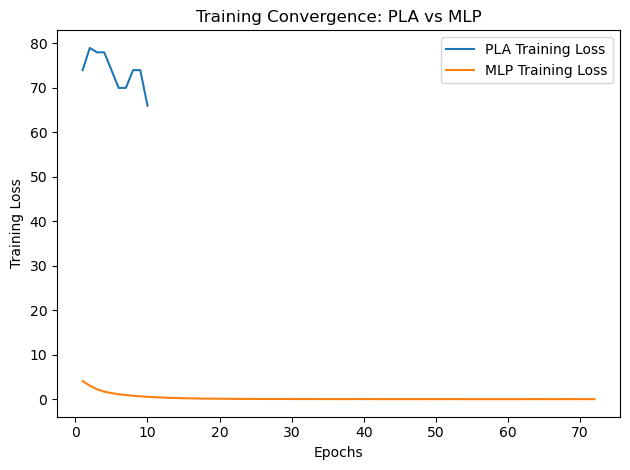

In [41]:
import matplotlib.pyplot as plt

# get loss from one perceptron
first_key = list(pla.models.keys())[0]
pla_loss = pla.models[first_key].loss_history

mlp_loss = best_mlp.loss_curve_

plt.figure()
plt.plot(range(1, len(pla_loss)+1), pla_loss, label="PLA Training Loss")
plt.plot(range(1, len(mlp_loss)+1), mlp_loss, label="MLP Training Loss")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Convergence: PLA vs MLP")
plt.legend()
plt.tight_layout()

plt.savefig("convergence_comparison.png", dpi=300)
plt.show()

In [42]:
print("PLA epochs:", len(pla_loss))
print("PLA final loss:", pla_loss[-1])

print("MLP epochs:", best_mlp.n_iter_)
print("MLP final loss:", best_mlp.loss_)

PLA epochs: 10
PLA final loss: 66
MLP epochs: 72
MLP final loss: 0.0076589088808834615


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# PLA predictions
pla_test_preds = pla.predict(X_test)

print("----- PLA Test Performance -----")
print("Accuracy:", accuracy_score(y_test, pla_test_preds))
print("Precision (macro):", precision_score(y_test, pla_test_preds, average='macro', zero_division=0))
print("Recall (macro):", recall_score(y_test, pla_test_preds, average='macro', zero_division=0))
print("F1-score (macro):", f1_score(y_test, pla_test_preds, average='macro', zero_division=0))

----- PLA Test Performance -----
Accuracy: 0.0859375
Precision (macro): 0.14257061906348736
Recall (macro): 0.08512544802867383
F1-score (macro): 0.08027498448811814


In [44]:
# MLP predictions (scaled data)
mlp_test_preds = best_mlp.predict(X_test_scaled)

print("----- MLP Test Performance -----")
print("Accuracy:", accuracy_score(y_test, mlp_test_preds))
print("Precision (macro):", precision_score(y_test, mlp_test_preds, average='macro', zero_division=0))
print("Recall (macro):", recall_score(y_test, mlp_test_preds, average='macro', zero_division=0))
print("F1-score (macro):", f1_score(y_test, mlp_test_preds, average='macro', zero_division=0))

----- MLP Test Performance -----
Accuracy: 0.46484375
Precision (macro): 0.47704504277084925
Recall (macro): 0.46505376344086025
F1-score (macro): 0.4583309766613319


<Figure size 640x480 with 0 Axes>

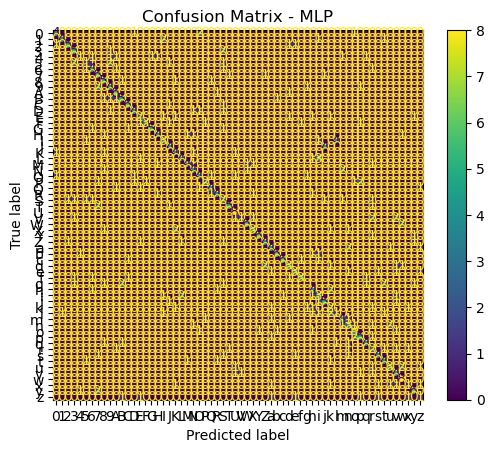

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test, mlp_test_preds)
plt.title("Confusion Matrix - MLP")
plt.savefig("confusion_matrix_mlp.png", dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

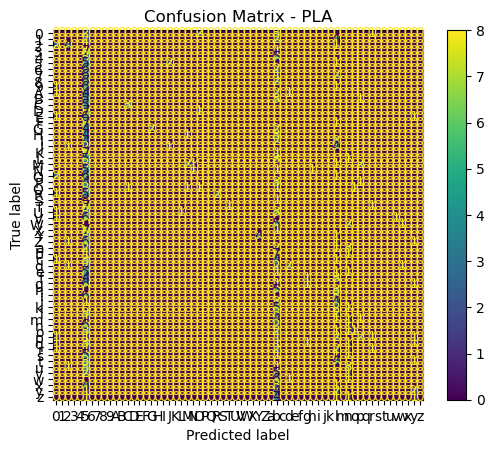

In [49]:
plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test, pla_test_preds)
plt.title("Confusion Matrix - PLA")
plt.savefig("confusion_matrix_pla.png", dpi=300)
plt.show()

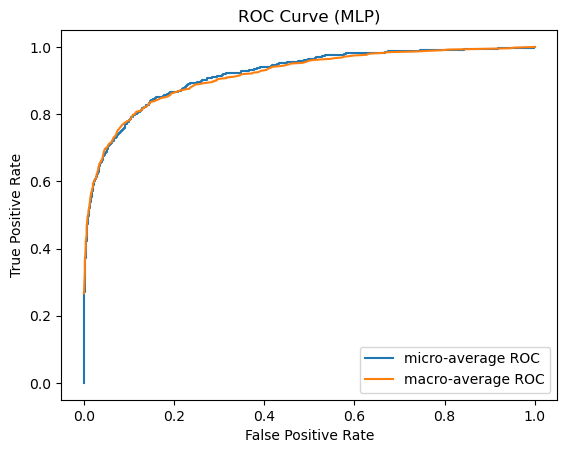

In [50]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Binarize labels
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

# probability scores from MLP
y_score = best_mlp.predict_proba(X_test_scaled)

n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(
    y_test_bin.ravel(), y_score.ravel()
)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label="micro-average ROC")
plt.plot(fpr["macro"], tpr["macro"], label="macro-average ROC")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MLP)")
plt.legend()
plt.savefig("roc_curve_mlp.png", dpi=300)
plt.show()

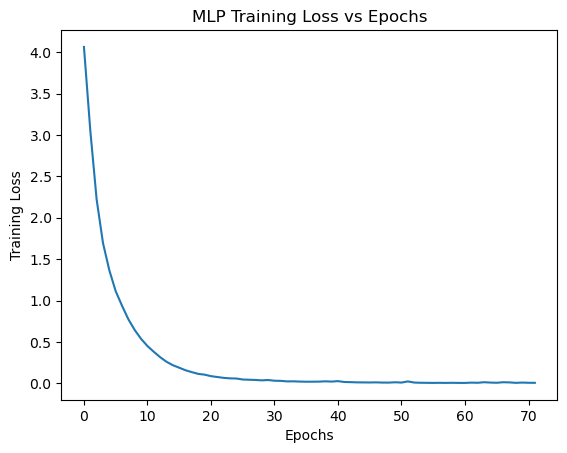

In [51]:
plt.figure()
plt.plot(best_mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("MLP Training Loss vs Epochs")
plt.savefig("mlp_loss_curve.png", dpi=300)
plt.show()